<h1>1. Introduction</h1>

In [1]:
#first of all import of neccessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install openpyxl #openpyxl is a Python library to read/write Excel 2010 xlsx/xlsm/xltx/xltm files.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00


In [3]:
df=pd.read_excel('/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [6]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [7]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Area                 0.495999
Perimeter            0.414539
Major_Axis_Length    0.502980
Minor_Axis_Length    0.104303
Convex_Area          0.494016
Equiv_Diameter       0.271868
Eccentricity        -0.748623
Solidity            -5.691009
Extent              -1.026568
Roundness           -0.372687
Aspect_Ration        0.548231
Compactness         -0.062377
dtype: float64

<h1>2. Visualization</h1>

In [8]:
df_corr =  df.corr()

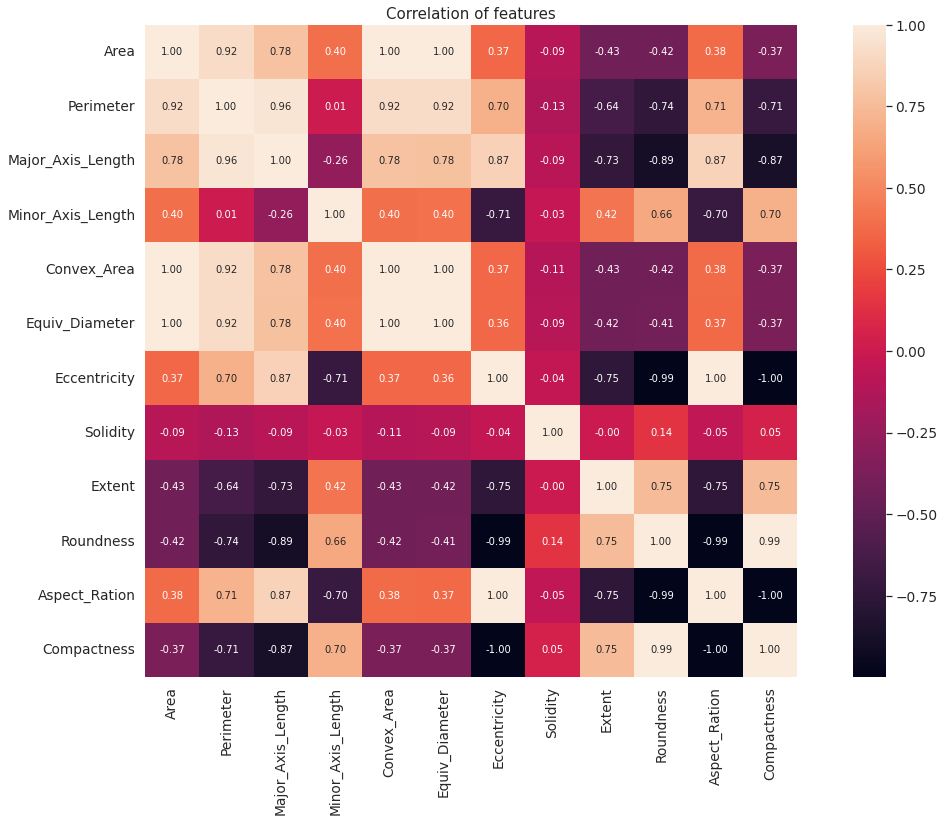

In [9]:
cm = np.corrcoef(df_corr.values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(20,12))
plt.title("Correlation of features")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=df_corr.columns.values, xticklabels=df_corr.columns.values)
plt.show()

<h1>3. Preparing data to ML</h1>

In [10]:
df['Class'] = df.Class.replace({'Çerçevelik':0, 'Ürgüp Sivrisi':1}) #[0 1], got ['Çerçevelik' 'Ürgüp Sivrisi']

In [11]:
df.Class.unique()

array([0, 1])

In [12]:
from sklearn.decomposition import PCA #для снижения размерности данных с минимальными потерями
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [13]:
X = df.drop('Class', axis=1)
y = df.Class

In [14]:
X.shape, y.shape

((2500, 12), (2500,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [16]:
pca = PCA()
pca.fit(X_train)

PCA()

In [17]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

<h1>4. Models</h1>

In [18]:
from sklearn.svm import LinearSVC

In [19]:
linearSVC = LinearSVC(random_state=12)
b = linearSVC.fit(X_train_pca, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [20]:
pred_yb = b.predict(X_test_pca)

In [21]:
import xgboost as xgb

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [23]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)

In [24]:
grid.fit(X_train_pca, y_train)
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 20}

In [25]:
grid.best_score_

0.892

In [26]:
clf = RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=40)

In [27]:
clf.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=40)

In [28]:
clf_pred = clf.predict(X_test_pca)

In [29]:
xgb_model = xgb.XGBClassifier()

In [30]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_xgb = GridSearchCV(xgb_model, params, cv=5)

In [31]:
grid_xgb.fit(X_train_pca, y_train)
grid_xgb.best_params_
grid_xgb.best_score_

0.8888

In [32]:
grid_xgb.best_score_

0.8888

In [33]:
grid_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 0.6}

In [34]:
xgb_model = xgb.XGBClassifier(colsample_bytree=1, gamma=1.5, max_depth=5, min_child_weight=10, subsample=.6)

In [35]:
xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
predictions = xgb_model.predict(X_test_pca)

In [37]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

<h1>5. Result</h1>

In [38]:
print("LinearSVC score:",accuracy_score(y_test, pred_yb))
print("XGBoost score:",accuracy_score(y_test, predictions))
print("RandomForestClassifier score:",accuracy_score(y_test, clf_pred))

LinearSVC score: 0.8344
XGBoost score: 0.8816
RandomForestClassifier score: 0.8792
